1. Loading Libraries and Data

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
data = pd.read_excel('Combine.xlsx')
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,title,text,subject,date,classification
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31 00:00:00,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31 00:00:00,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30 00:00:00,0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29 00:00:00,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25 00:00:00,0
...,...,...,...,...,...
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22 00:00:00,1
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22 00:00:00,1
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22 00:00:00,1
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22 00:00:00,1


2. Data Exploration

2.1 Data Summary

In [6]:
data.describe()

,classification
count,44919.000000
mean,0.476792
std,0.499467
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


2.2 Check Columns

In [8]:
data.columns

Index(['title', 'text', 'subject', 'date', 'classification'], dtype='object')

2.3 Check Data Types

In [10]:
data.dtypes

title             object
text              object
subject           object
date              object
classification     int64
dtype: object

3. Visualizing Data

<Axes: title={'center': 'classification'}, xlabel='classification'>

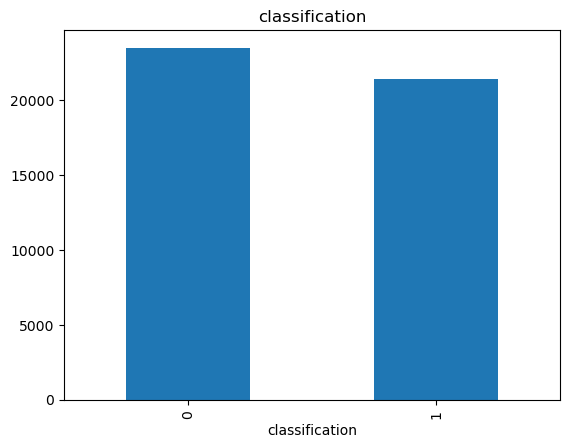

In [12]:
data.hist(bins=60)
data['classification'].value_counts().plot(kind='bar')

4. Data Cleaning

4.1 Dropping Unnecessary Columns

In [15]:
data= data.drop(columns=['subject','date'])

In [16]:
data.head()

,title,text,classification
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


4.2 Check Null Values

In [18]:
df = data[['title', 'text', 'classification']]

In [19]:
df.isna().sum()

title             0
text              0
classification    0
dtype: int64

5. Class Distribution

<Axes: ylabel='count'>

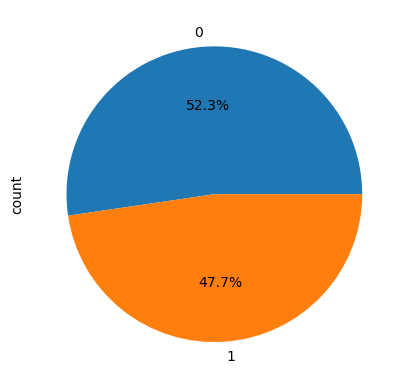

In [21]:
pie = df['classification'].value_counts()
pie.plot(kind='pie', autopct='%1.1f%%')

6. Lowercasing Text

In [23]:
def preprocess_text(text):
    return text.lower()
df['title'] = df['title'].apply(preprocess_text)
df['text'] = df['text'].apply(preprocess_text)

In [24]:
data

,title,text,classification
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


7. Tokenization and Removal of Punctuation & Stop Words

In [26]:
def preprocess_text(text):
    tokens = word_tokenize(text) # Tokenization
    tokens = [word for word in tokens if word.isalnum()] # Remove punctuation
    stop_words = set(stopwords.words('english')) # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [27]:
df['title'] = df['title'].apply(preprocess_text)

In [28]:
df

,title,text,classification
0,donald trump sends embarrassing new eve messag...,donald trump just couldn t wish all americans ...,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0
2,sheriff david clarke becomes internet joke thr...,"on friday, it was revealed that former milwauk...",0
3,trump obsessed even name coded website images,"on christmas day, donald trump announced that ...",0
4,pope francis called donald trump christmas speech,pope francis used his annual christmas day mes...,0
...,...,...,...
44914,committed nato backs new approach afghanistan,brussels (reuters) - nato allies on tuesday we...,1
44915,lexisnexis withdrew two products chinese market,"london (reuters) - lexisnexis, a provider of l...",1
44916,minsk cultural hub becomes authorities,minsk (reuters) - in the shadow of disused sov...,1
44917,vatican upbeat possibility pope francis visiti...,moscow (reuters) - vatican secretary of state ...,1


In [29]:
df['text'] = df['text'].apply(preprocess_text)

In [30]:
df

,title,text,classification
0,donald trump sends embarrassing new eve messag...,donald trump wish americans happy new year lea...,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,0
3,trump obsessed even name coded website images,christmas day donald trump announced would bac...,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,0
...,...,...,...
44914,committed nato backs new approach afghanistan,brussels reuters nato allies tuesday welcomed ...,1
44915,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,1
44916,minsk cultural hub becomes authorities,minsk reuters shadow disused factories minsk s...,1
44917,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,1


8. Stemming and Lemmatization

In [32]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming(text): # Function to apply stemming
    return stemmer.stem(text)

def apply_lemmatization(text): # Function to apply lemmatization
    return lemmatizer.lemmatize(text)

# Apply stemming to 'text' and 'title' columns
df['text'] = df['text'].apply(apply_stemming)
df['title'] = df['title'].apply(apply_stemming)

# Apply lemmatization to 'text' and 'title' columns
df['text'] = df['text'].apply(apply_lemmatization)
df['title'] = df['title'].apply(apply_lemmatization)

In [54]:
df

,title,text,classification
0,donald trump sends embarrassing new eve messag...,donald trump wish americans happy new year lea...,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,0
3,trump obsessed even name coded website imag,christmas day donald trump announced would bac...,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,0
...,...,...,...
44914,committed nato backs new approach afghanistan,brussels reuters nato allies tuesday welcomed ...,1
44915,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,1
44916,minsk cultural hub becomes author,minsk reuters shadow disused factories minsk s...,1
44917,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,1


9. Removing Special Characters and Symbols

In [56]:
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df['title'] = df['title'].str.replace(r'[^\w\s]', '', regex=True)

10. Final Clean Dataset

In [58]:
df

,title,text,classification
0,donald trump sends embarrassing new eve messag...,donald trump wish americans happy new year lea...,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,0
3,trump obsessed even name coded website imag,christmas day donald trump announced would bac...,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,0
...,...,...,...
44914,committed nato backs new approach afghanistan,brussels reuters nato allies tuesday welcomed ...,1
44915,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,1
44916,minsk cultural hub becomes author,minsk reuters shadow disused factories minsk s...,1
44917,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,1


In [60]:
df.isna().sum()

title             0
text              0
classification    0
dtype: int64

In [64]:
df.head()

,title,text,classification
0,donald trump sends embarrassing new eve messag...,donald trump wish americans happy new year lea...,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,0
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,0
3,trump obsessed even name coded website imag,christmas day donald trump announced would bac...,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,0
